In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 读取负荷数据集
load_df = pd.read_csv('./allbus_p.csv')

# 提取负荷数据
load_data = load_df.iloc[:,0:16].values
print((load_data))

features = np.column_stack((load_data,))
# 检查是否存在 NaN 值
has_nan = np.isnan(features).any()
print(has_nan)
# 检查是否存在无穷大值
has_inf = np.isinf(features).any()
print(has_inf)
features[np.isnan(features)] = 0.0  # 将 NaN 替换为 0.0
#归一化
normalized_data = normalize(features)

[[65875.83062 66661.66176 66373.01048 ... 63549.13392 63432.55445
  63432.03274]
 [63122.24843 63171.74963 63527.76424 ... 68379.80796 68373.94027
  68946.59101]
 [67562.78485 66190.22653 65849.61628 ... 59169.88687 57757.40355
  56400.44753]
 ...
 [94736.77018 95863.673   97102.4372  ... 99600.28132 99770.32394
  99548.93484]
 [99045.20159 98874.69191 98620.00276 ... 95894.23528 97128.79247
  97278.18573]
 [97193.7424  97073.86953 97424.77728 ... 89677.55944 88522.7777
  87629.49743]]
False
False


In [2]:
mergings = linkage(features , method='complete')

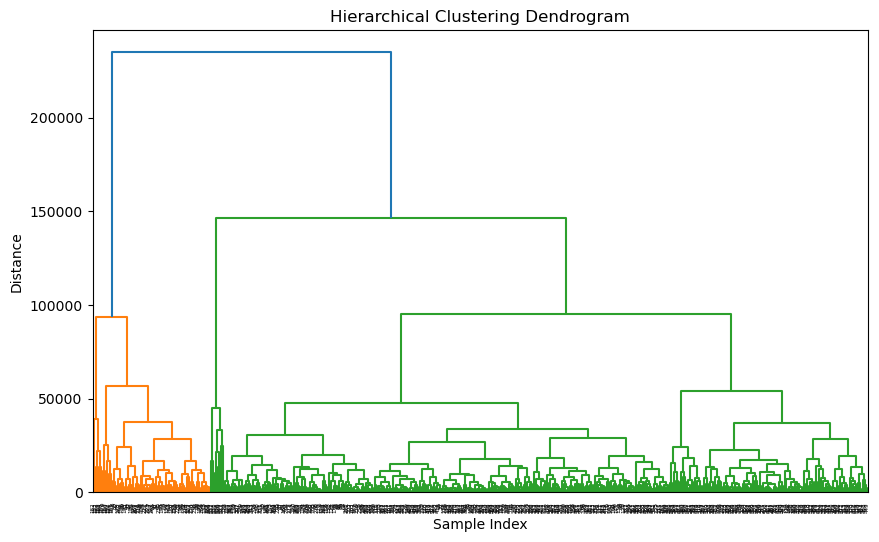

In [3]:
# 绘制层次聚合的树状图
plt.figure(figsize=(10, 6))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=4,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [4]:
# 根据层次聚合结果获取聚类标签
threshold = 80000  # 设定阈值
clusters = fcluster(mergings, threshold, criterion='distance')
# 获取聚类簇的数量
num_clusters = len(np.unique(clusters))
print(num_clusters)

5


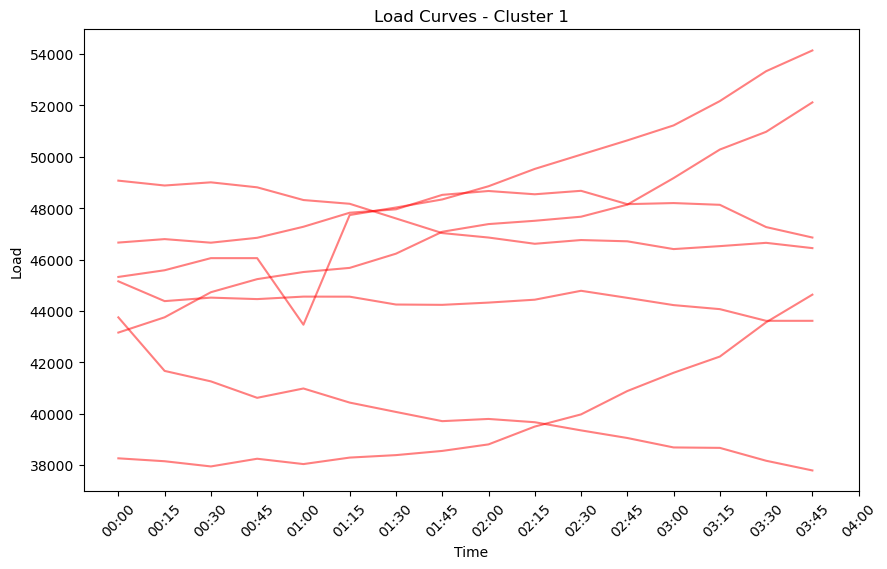

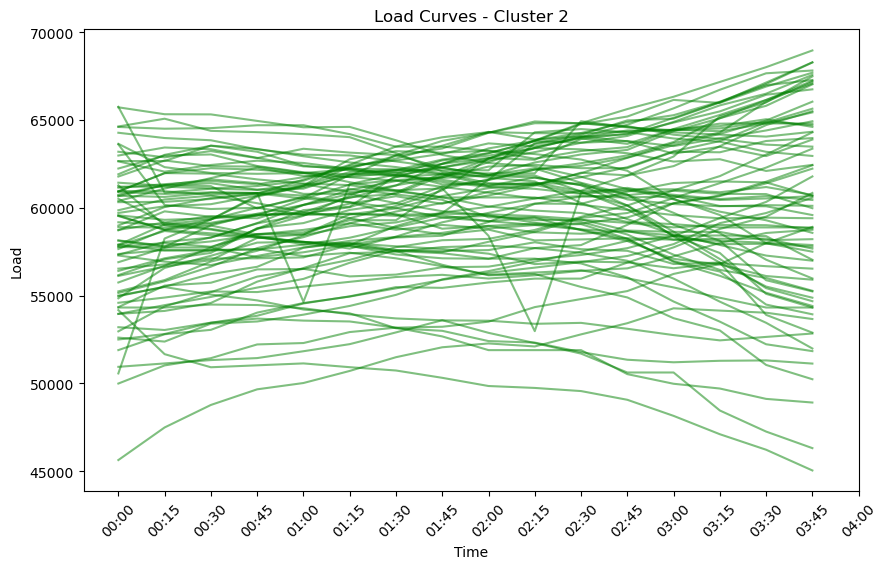

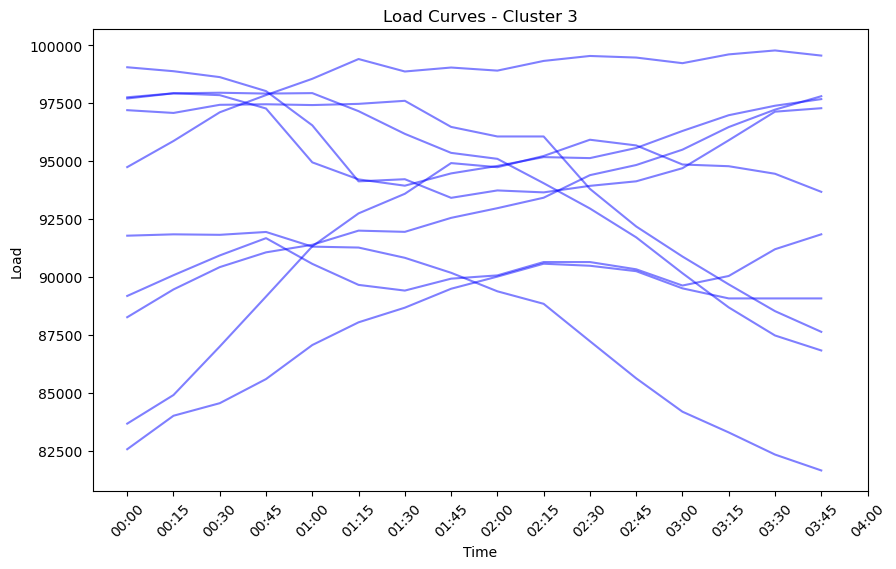

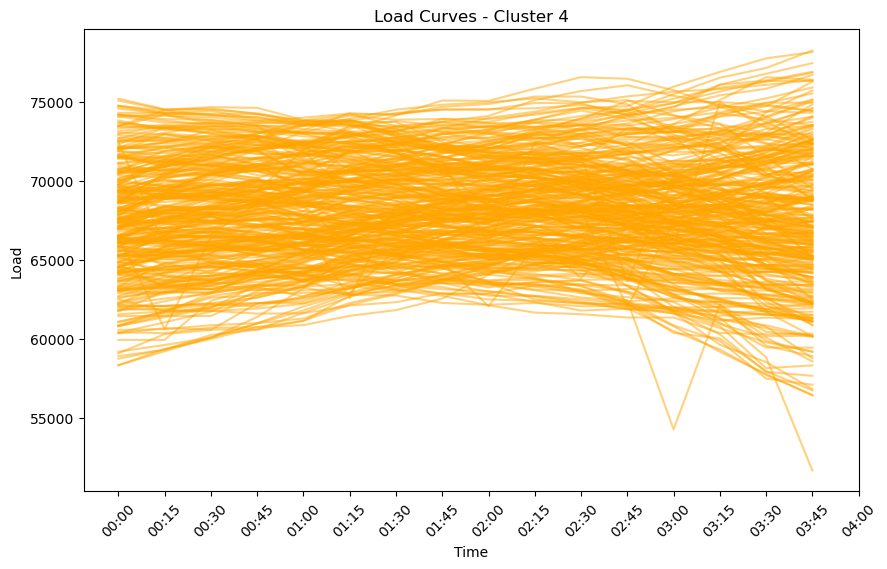

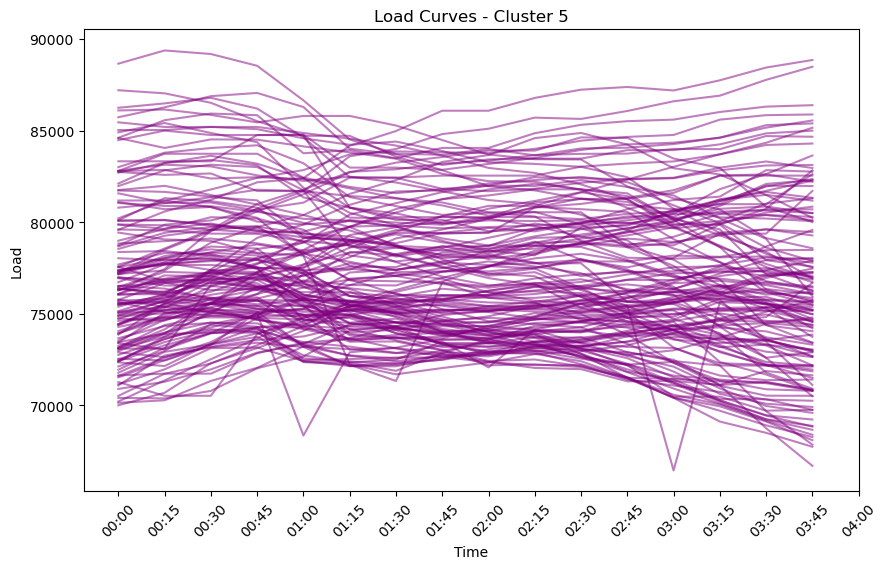

16


In [5]:
# 定义颜色列表
colors = ['red', 'green', 'blue', 'orange', 'purple']

# 绘制每个聚类簇的负荷曲线
num_intervals = load_data.shape[1]  # 时间间隔数量
interval_labels = pd.date_range(start='00:00', end='4:00', freq='15min').strftime('%H:%M')  # 生成时间标签
for cluster_id in range(1, num_clusters+1):
    plt.figure(figsize=(10, 6))
    for i in range(len(clusters)):
        if clusters[i] == cluster_id:
            plt.plot(range(num_intervals), load_data[i], color=colors[cluster_id-1], alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Load')
    plt.title(f'Load Curves - Cluster {cluster_id}')
    plt.xticks(range(0, num_intervals+1), interval_labels, rotation=45)  # 设置x轴刻度和标签
    plt.savefig(f'cluster_{cluster_id}_load_curve.png')  # 保存图像
    plt.show()
    plt.close()  # 关闭图像窗口
print(num_intervals)

In [7]:
# 将聚类结果标记在loadweather数据集的Cluster列上
load_df.loc[:, 'Cluster'] = fcluster(mergings, 5, criterion='maxclust')

# 保存修改后的数据集到原始CSV文件
load_df.to_csv('allbus_p.csv', index=False)

C:\Users\admin\AppData\Local\Temp\ipykernel_17988\2606135926.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  load_df.loc[:, 'Cluster'] = fcluster(mergings, 5, criterion='maxclust')


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

loadweather_data = pd.read_csv('allbus_p.csv', nrows=499)#读到表格500的位置

loadweather_data1 = pd.read_csv('allbus_p.csv', skiprows=range(1, 500), nrows=41)

# 提取关键影响因素
key_features = loadweather_data.columns[0:16]

# 提取特征和目标变量
X = loadweather_data.iloc[0:,0:16]
y = loadweather_data['Cluster']
X1= loadweather_data1.iloc[0:,0:16]

# 构建决策树模型
clf = DecisionTreeClassifier()

# 计算特征重要性
clf.fit(X, y)
feature_importance = clf.feature_importances_

# 构建包含特征重要性的特征列表
key_features_with_importance = []
for feature, importance in zip(key_features, feature_importance):
    key_features_with_importance.append((feature, importance))
print(key_features_with_importance)
# 根据特征重要性排序特征列表
key_features_with_importance.sort(key=lambda x: x[1], reverse=True)

# 提取按重要性排序后的特征
sorted_key_features = [feature for feature, _ in key_features_with_importance]
print(sorted_key_features)
# 构建决策树模型，并使用排序后的特征进行训练
clf = DecisionTreeClassifier()
clf.fit(X[sorted_key_features], y)



# 使用决策树进行分类
predicted_clusters = clf.predict(X1[sorted_key_features])


from sklearn.tree import export_text

# # 输出决策树模型

# # 打印分类预测结果
for i, cluster in enumerate(predicted_clusters):
     print(f"样本 {i+1} 的预测类别为: {cluster}")
        


[('1', 0.004752313062194348), ('2', 0.007003150158168986), ('3', 0.0), ('4', 0.05145765695983722), ('5', 0.43006188346969193), ('6', 0.34710711668107946), ('7', 0.043174845545259334), ('8', 0.004650477782290185), ('9', 0.0), ('10', 0.005940391327742936), ('11', 0.0), ('12', 0.02752457623140985), ('13', 0.04786125790654518), ('14', 0.027002667445990263), ('15', 0.0034636634297901406), ('16', 0.0)]
['5', '6', '4', '13', '7', '12', '14', '2', '10', '1', '8', '15', '3', '9', '11', '16']
样本 1 的预测类别为: 4
样本 2 的预测类别为: 4
样本 3 的预测类别为: 5
样本 4 的预测类别为: 5
样本 5 的预测类别为: 5
样本 6 的预测类别为: 4
样本 7 的预测类别为: 4
样本 8 的预测类别为: 4
样本 9 的预测类别为: 4
样本 10 的预测类别为: 5
样本 11 的预测类别为: 5
样本 12 的预测类别为: 4
样本 13 的预测类别为: 4
样本 14 的预测类别为: 5
样本 15 的预测类别为: 5
样本 16 的预测类别为: 5
样本 17 的预测类别为: 5
样本 18 的预测类别为: 4
样本 19 的预测类别为: 4
样本 20 的预测类别为: 5
样本 21 的预测类别为: 5
样本 22 的预测类别为: 5
样本 23 的预测类别为: 5
样本 24 的预测类别为: 5
样本 25 的预测类别为: 4
样本 26 的预测类别为: 5
样本 27 的预测类别为: 5
样本 28 的预测类别为: 5
样本 29 的预测类别为: 5
样本 30 的预测类别为: 5
样本 31 的预测类别为: 5
样本 32 的预测类别为: 5
样本 33 的预测

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

loadweather_data = pd.read_csv('allbus_p.csv')  # 读取表格的前499行数据

# 提取关键影响因素
key_features = loadweather_data.columns[0:16]

# 提取特征和目标变量
X = loadweather_data[key_features]
y = loadweather_data['Cluster']

# 将数据分割为训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)



# 构建决策树模型
clf = DecisionTreeClassifier()

# 计算特征重要性
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_

# 构建包含特征重要性的特征列表
key_features_with_importance = []
for feature, importance in zip(key_features, feature_importance):
    key_features_with_importance.append((feature, importance))
print(key_features_with_importance)
# 根据特征重要性排序特征列表
key_features_with_importance.sort(key=lambda x: x[1], reverse=True)

# 提取按重要性排序后的特征
sorted_key_features = [feature for feature, _ in key_features_with_importance]
print(sorted_key_features)
# 构建决策树模型，并使用排序后的特征进行训练
clf = DecisionTreeClassifier()
clf.fit(X_train[sorted_key_features], y_train)



# 使用决策树进行分类
predicted_clusters = clf.predict(X_valid[sorted_key_features])


from sklearn.tree import export_text

# # 输出决策树模型

# # 打印分类预测结果
for i, cluster in enumerate(predicted_clusters):
     print(f"样本 {i+1} 的预测类别为: {cluster}")
        
accuracy = accuracy_score(y_valid, predicted_clusters)
print(f"预测准确率为: {accuracy}")

[('1', 0.0), ('2', 0.019266627872898016), ('3', 0.006238717596938404), ('4', 0.46700539547024017), ('5', 0.0), ('6', 0.06633302921432764), ('7', 0.364112793405001), ('8', 0.0014297061159650563), ('9', 0.0), ('10', 0.0), ('11', 0.022713777658756346), ('12', 0.019793673235985347), ('13', 0.0), ('14', 0.029271379799478293), ('15', 0.003834899630409473), ('16', 0.0)]
['4', '7', '6', '14', '11', '12', '2', '3', '15', '8', '1', '5', '9', '10', '13', '16']
样本 1 的预测类别为: 4
样本 2 的预测类别为: 4
样本 3 的预测类别为: 5
样本 4 的预测类别为: 4
样本 5 的预测类别为: 4
样本 6 的预测类别为: 4
样本 7 的预测类别为: 4
样本 8 的预测类别为: 5
样本 9 的预测类别为: 4
样本 10 的预测类别为: 4
样本 11 的预测类别为: 4
样本 12 的预测类别为: 4
样本 13 的预测类别为: 4
样本 14 的预测类别为: 4
样本 15 的预测类别为: 4
样本 16 的预测类别为: 4
样本 17 的预测类别为: 2
样本 18 的预测类别为: 4
样本 19 的预测类别为: 3
样本 20 的预测类别为: 2
样本 21 的预测类别为: 4
样本 22 的预测类别为: 2
样本 23 的预测类别为: 4
样本 24 的预测类别为: 4
样本 25 的预测类别为: 5
样本 26 的预测类别为: 2
样本 27 的预测类别为: 2
样本 28 的预测类别为: 5
样本 29 的预测类别为: 4
样本 30 的预测类别为: 4
样本 31 的预测类别为: 5
样本 32 的预测类别为: 2
样本 33 的预测类别为: 4
样本 34 的预测类别为: 5
样本 35 的预测类别